# KNN

Make sure DMBA package is available

In [90]:
pip install dmba

In [91]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import dmba
from dmba import classificationSummary



In [ ]:
mower_df = dmba.load_data('RidingMowers.csv')
mower_df.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [ ]:
mower_df['Ownership'] = mower_df['Ownership'].astype(pd.CategoricalDtype())

In [ ]:
mower_df['Ownership'] = mower_df['Ownership'].cat.codes

In [ ]:
y = mower_df['Ownership']

In [ ]:
X = mower_df.drop(columns=['Ownership'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [ ]:
X_train_scaled.head()

,0,1
0,-1.557479,-0.085413
1,2.068995,0.066432
2,-0.061735,0.977501
3,0.418032,0.218277
4,-1.077712,0.521966


In [ ]:
X_test_scaled = pd.DataFrame(X_test_scaled)

Use k-nearest neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.375



Initialize a data frame with two columns: `k` and `accuracy`

In [ ]:
# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test_scaled))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1     0.375
1    2     0.250
2    3     0.375
3    4     0.375
4    5     0.500
5    6     0.500
6    7     0.750
7    8     0.625
8    9     0.625
9   10     0.625
10  11     0.625
11  12     0.625
12  13     0.625
13  14     0.375


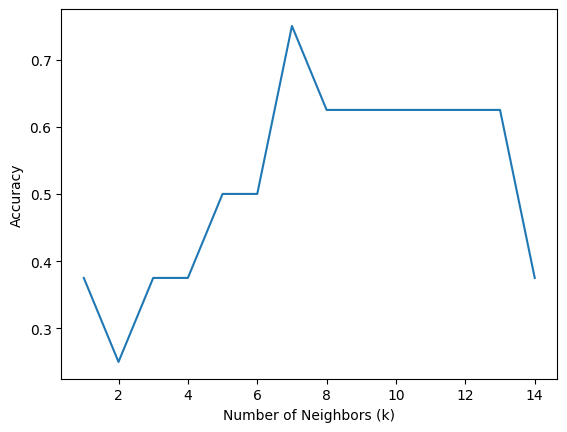

In [ ]:
k_values = range(1, 15)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)
    scores = accuracy_score(y_test, knn.predict(X_test_scaled))
    accuracy_scores.append(scores.mean())


plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
delays_df = dmba.load_data('FlightDelays.csv')
delays_df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [ ]:
# convert to categorical
delays_df['Flight Status'] = delays_df['Flight Status'].astype(pd.CategoricalDtype())
delays_df['Flight Status'] = delays_df['Flight Status'].cat.codes

delays_df['DAY_WEEK'] = delays_df['DAY_WEEK'].astype(pd.CategoricalDtype())
delays_df['DAY_WEEK'] = delays_df['DAY_WEEK'].cat.codes

delays_df['ORIGIN'] = delays_df['ORIGIN'].astype(pd.CategoricalDtype())
delays_df['ORIGIN'] = delays_df['ORIGIN'].cat.codes

delays_df['DEST'] = delays_df['DEST'].astype(pd.CategoricalDtype())
delays_df['DEST'] = delays_df['DEST'].cat.codes

delays_df['CARRIER'] = delays_df['CARRIER'].astype(pd.CategoricalDtype())
delays_df['CARRIER'] = delays_df['CARRIER'].cat.codes


In [ ]:
X = delays_df[['DAY_WEEK', 'ORIGIN', 'DEST', 'CARRIER']]
y = delays_df['Flight Status']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

In [ ]:
# run naive Bayes
delays_nb = MultinomialNB()
delays_nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# predict class membership
y_valid_pred = delays_nb.predict(X_valid)

In [ ]:
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Test Accuracy after Discretization: {accuracy}")


Test Accuracy after Discretization: 0.8047673098751419


Neural Network

In [92]:
from sklearn.neural_network import MLPClassifier

In [93]:
example_df = dmba.load_data('TinyData.csv')

In [94]:
example_df.head()

,Obs.,Fat,Salt,Acceptance
0,1,0.2,0.9,like
1,2,0.1,0.1,dislike
2,3,0.2,0.4,dislike
3,4,0.2,0.5,dislike
4,5,0.4,0.5,like


In [95]:
example_df['Acceptance'] = example_df['Acceptance'].astype(pd.CategoricalDtype())
example_df['Acceptance'] = example_df['Acceptance'].cat.codes

In [96]:
X = example_df[['Fat', 'Salt']]
y = example_df['Acceptance']

In [97]:
classes = sorted(y.unique())

In [98]:
clf = MLPClassifier(hidden_layer_sizes=[1], activation='logistic',  random_state=1)
clf.fit(X, y)
clf.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 0, 0, 0, 0, 0], dtype=int8)

In [99]:
print(clf.intercepts_)

[array([-0.97606005]), array([-0.52003189])]


In [100]:
print(clf.coefs_)

[array([[-0.30073039],
       [ 0.19350597]]), array([[-0.2189643]])]


In [101]:
# Prediction
print(pd.concat([example_df,pd.DataFrame(clf.predict_proba(X), columns=classes)], axis=1))

   Obs.  Fat  Salt  Acceptance         0         1
0     1  0.2   0.9           1  0.642227  0.357773
1     2  0.1   0.1           0  0.640950  0.359050
2     3  0.2   0.4           0  0.641231  0.358769
3     4  0.2   0.5           0  0.641427  0.358573
4     5  0.4   0.5           1  0.640823  0.359177
5     6  0.3   0.8           1  0.641713  0.358287


In [102]:
classificationSummary(y, clf.predict(X), class_names=classes)

Confusion Matrix (Accuracy 0.5000)

       Prediction
Actual 0 1
     0 3 0
     1 3 0


In [ ]:
MLPClassifier(hidden_layer_sizes=(64, 32),  # Two hidden layers with 64 and 32 neurons
                    activation='relu',            # Activation function: ReLU
                    solver='adam',                # Optimizer: Adam
                    max_iter=500,                 # Maximum number of iterations
                    random_state=42)